## Linear Regression Examples

This is a collection of different ways to do linear regression and curve plotting in Python!

In [ ]:
# Includes and Standard Magic...
### Standard Magic and startup initializers.

# Load Numpy
import numpy as np
# Load MatPlotLib
import matplotlib
import matplotlib.pyplot as plt
# Load Pandas
import pandas as pd
# Load SQLITE
import sqlite3
# Load Stats
from scipy import stats

# This lets us show plots inline and also save PDF plots if we want them
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('fivethirtyeight')

# These two things are for Pandas, it widens the notebook and lets us display data easily.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Show a ludicrus number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

For this work we will be using data from: Generalized body composition prediction equation for men using simple measurement techniques", K.W. Penrose, A.G. Nelson, A.G. Fisher, FACSM, Human Performance research Center, Brigham Young University, Provo, Utah 84602 as listed in Medicine and Science in Sports and Exercise, vol. 17, no. 2, April 1985, p. 189.

[Data availabe here.](http://staff.pubhealth.ku.dk/~tag/Teaching/share/data/Bodyfat.html)


In [ ]:
# Load the Penrose Data
df_penrose = pd.read_csv("./data/bodyfat.csv")

In [ ]:
display(df_penrose.head())
# observations = ['Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']
observations = ['Age', 'Neck', 'Forearm', 'Wrist']

In [ ]:
len(df_penrose)

Let's do some basic scatter plots first to see what's going on.

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15,5))

for i,o in enumerate(observations):
    df_penrose.plot.scatter(x=o, y='bodyfat', ax=ax[i])

Let's say we want to look at some linear regressions of single variables to see what is going on!  So let's plot some regression lines.  Note that there are at least a few different ways -- [linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), [polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html), and [statsmodels](https://www.statsmodels.org/stable/index.html).

Here's a good article about it [Data science with Python: 8 ways to do linear regression and measure their speed](https://www.freecodecamp.org/news/data-science-with-python-8-ways-to-do-linear-regression-and-measure-their-speed-b5577d75f8b/).

In [ ]:
# Let's do a basic Linear Regression on a Single Variable.
# Note that linregress p-value is whether or not the slope is 0, not if the correlation is significant.
fig, ax = plt.subplots(1, 4, figsize=(15,5))

for i,o in enumerate(observations):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_penrose[o],df_penrose['bodyfat'])

    # Pack these into a nice title
    diag_str = "p-value =" + str(round(p_value, 7)) + "\n" + "r-value =" + str(round(r_value, 7)) + "\nstd err. =" + str(round(std_err, 7))
    df_penrose.plot.scatter(x=o, y='bodyfat', title=diag_str, ax=ax[i])
    
    # Make points and line
    pts = np.linspace(df_penrose[o].min(), df_penrose[o].max(), 500)
    line = slope * pts + intercept
    ax[i].plot(pts, line, lw=1, color='red')
    
    

In [ ]:
# Let's try to fit a linear model with PolyFit.

fig, ax = plt.subplots(1, 4, figsize=(15,5))

for i,o in enumerate(observations):
    # Fit our curve
    x1, intercept = np.polyfit(df_penrose[o],df_penrose['bodyfat'], 1)
    
    # Plot regular points
    df_penrose.plot.scatter(x=o, y='bodyfat', ax=ax[i])
    
    # Plot curve
    pts = np.linspace(df_penrose[o].min(), df_penrose[o].max(), 500)
    line = x1 * pts + intercept
    ax[i].plot(pts, line, lw=1, ls='-', color='red')

In [ ]:
# Let's try fitting a degree 2 polynomial with polyfit.

fig, ax = plt.subplots(1, 4, figsize=(15,5))

for i,o in enumerate(observations):
    
    # Fit the polynomial.
    x2, x1, intercept = np.polyfit(df_penrose[o],df_penrose['bodyfat'], 2)

    # Plot our points.
    df_penrose.plot.scatter(x=o, y='bodyfat', ax=ax[i])
    
    # Plot the Regression Line..
    pts = np.linspace(df_penrose[o].min(), df_penrose[o].max(), 500)
    line = x2 * pts**2 + x1 * pts + intercept
    ax[i].plot(pts, line, lw=1, ls='-', color='red')

In [ ]:
# Let's try fitting a degree 5 polynomial with polyfit.

fig, ax = plt.subplots(1, 4, figsize=(15,5))

for i,o in enumerate(observations):
    
    # Fit the polynomial.
    x5, x4, x3, x2, x1, intercept = np.polyfit(df_penrose[o],df_penrose['bodyfat'], 5)

    # Plot our points.
    df_penrose.plot.scatter(x=o, y='bodyfat', ax=ax[i])
    
    # Plot the Regression Line..
    pts = np.linspace(df_penrose[o].min(), df_penrose[o].max(), 500)
    line = x5 * pts**5 + x4 * pts**4 + x3 * pts**3 + x2 * pts**2 + x1 * pts + intercept
    ax[i].plot(pts, line, lw=1, ls='-', color='red')

## A More Complicated example with Statsmodels.

Statsmodels (you'll likely need to install it) gives a much more R-like interface to linear modeling.  You can read [more about it here](https://www.statsmodels.org/stable/index.html).

In [ ]:
import statsmodels.api as sm

In [ ]:
df_ind = df_penrose[['Neck', 'Wrist']]
df_target = df_penrose['bodyfat']

In [ ]:
X = df_ind
y = df_target

# Note the difference in argument order
# Call: endog, then exog (dependent, indepenednt)
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
# Print out the statistics
model.summary()
#fig, ax = plt.subplots(figsize=(12,8))
#fig = sm.graphics.plot_partregress(endog="bodyfat", exog_i=['Abdomen', 'Neck'], exog_others='', data=df_penrose)

We can also use the [single regressor plot](https://tedboy.github.io/statsmodels_doc/generated/statsmodels.graphics.api.plot_partregress.html#statsmodels.graphics.api.plot_partregress).

In [ ]:
from statsmodels.graphics.regressionplots import plot_partregress
fig, ax = plt.subplots(figsize=(12,8))
plot_partregress(endog='bodyfat', exog_i='Neck', exog_others='', data=df_penrose, ax=ax)
plt.show()

If we have multiple elements in our regression then we need to use a different plot.

In [ ]:
# Multiple regression plot
from statsmodels.graphics.regressionplots import plot_partregress_grid
fig = plt.figure(figsize=(8, 6))
plot_partregress_grid(model, fig=fig)
plt.show()

Another way to work with regressions and their plots is using the [Seaborn Regression Package](https://seaborn.pydata.org/tutorial/regression.html)

In [ ]:
# Another way to do simple exploratory plots
import seaborn as sns
df_test = df_penrose.sample(frac=0.10, replace=False)
fig, ax = plt.subplots(1, 4, figsize=(15,5))

for i,o in enumerate(observations):
    sns.regplot(x=o, y='bodyfat', data=df_test, ax=ax[i])
    #g.axes.set_xlim(df_test[o].min()*.95,df_test[o].max()*1.05)
    


Another nice simulator to play with is [this one](https://ndirienzo.shinyapps.io/linear_regression_sim/) which is from [Prof. Nicholas DiRienzo](https://ischool.arizona.edu/people/nicholas-dirienzo) from ASU's School of Information 

# Logistic Regression

We can use sklearn to do a quick logistic regression.  Remember that for logistic regression we are testing whether or not something is true, so we need to add a variable to our data.

Someone is obese if their body fat is >32% so we'll add a dummy for that!

In [25]:
df_penrose['obese'] = df_penrose.apply(lambda x: 1 if x['bodyfat'] > 32 else 0, axis=1)

In [26]:
df_penrose

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,obese
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,0
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,0
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,0
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,0
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8,0
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7,0
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8,0
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2,0
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2,0


In [28]:
# We're going to use sklearn to build us a classifier.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# setup our data for testing and training.

X_train, X_test, y_train, y_test = train_test_split(df_penrose[observations],
                                                    df_penrose['obese'],
                                                    test_size=0.2)


In [32]:
X_train

,Age,Neck,Forearm,Wrist
239,65,40.8,30.5,19.1
208,47,36.0,27.5,17.7
173,36,38.7,28.4,17.8
137,43,37.7,28.4,17.7
217,51,36.9,25.9,18.6
193,42,38.5,29.9,18.5
142,52,37.5,27.5,17.9
64,57,40.1,31.1,18.4
5,24,39.0,30.6,18.8
147,25,40.9,29.7,18.4


In [33]:
# Fit that model!
logisticRegr = LogisticRegression(max_iter=100000, class_weight='balanced') 
model = logisticRegr.fit(X_train, y_train)

Accuracy Score is: 0.8627450980392157


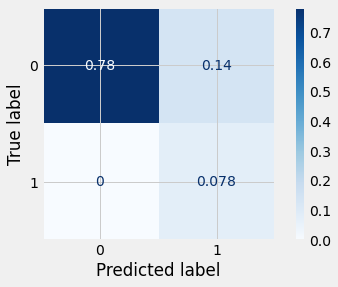

In [34]:
# Fit and plot!
from sklearn.metrics import accuracy_score, plot_confusion_matrix
y_pred = model.predict(X_test)
print(f"Accuracy Score is: {accuracy_score(y_test, y_pred)}")
plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=logisticRegr.classes_,
                                 cmap=plt.cm.Blues, normalize='all')

## How would you do this again to test the various bits of the model?  Find out in Lab 9!